In [68]:
BOOM = 'BOOM'
MOVE = 'MOVE'
INF = 99.0
ALL = [(0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7),(1,0),(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),
       (2,0),(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),(2,7),(3,0),(3,1),(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),
       (4,0),(4,1),(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(5,0),(5,1),(5,2),(5,3),(5,4),(5,5),(5,6),(5,7),
       (6,0),(6,1),(6,2),(6,3),(6,4),(6,5),(6,6),(6,7),(7,0),(7,1),(7,2),(7,3),(7,4),(7,5),(7,6),(7,7)]

import numpy as np
from copy import deepcopy, copy
from random import shuffle

class State():
    def __init__(self, board=None):
        if board is None:
            self.board = np.array([
                [1, 1, 0, 0, 0, 0,-1,-1],
                [1, 1, 0, 0, 0, 0,-1,-1],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0,-1,-1],
                [1, 1, 0, 0, 0, 0,-1,-1],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0,-1,-1],
                [1, 1, 0, 0, 0, 0,-1,-1]
            ])
        else:
            self.board = np.copy(board) ############## NO DEEPCOPY ##################
        self.turn = 0
        self.history = dd(int)

    def actions(self):
        """Return a list of the allowable moves at this point."""   
        def get_stack_actions(board, x, y):
            ''' Gets the actions of the stack at (x, y) '''
            ####################### REMOVED COLOUR ###########################
            # all pieces can boom at their position
            actions = [[BOOM, (x, y)]]
            # Moves
            height = abs(board[x][y])

            # all possible move positions on the board, including moves on to opposing pieces
            ##################### MAKE THIS MORE EFFICIENT ##########################
            all_coords = []
            for dx in range(1, height+1):
                if 0 <= x+dx < 8:
                    all_coords.append((x+dx, y))
                if 0 <= x-dx < 8:
                    all_coords.append((x-dx, y))

            for dy in range(1, height+1):
                if 0 <= y+dy < 8:
                    all_coords.append((x, y+dy))
                if 0 <= y-dy < 8:
                    all_coords.append((x, y-dy))

            # make sure we dont move onto an opposing colour
            all_coords = [(x1, y1) for x1, y1 in all_coords if (board[x1][y1] == 0) or (board[x1][y1] > 0)]

            # append all the moves with all possible number of pieces moved
            for n in range(1, height+1):
                for x_dest, y_dest in all_coords:
                    actions.append([MOVE, n, (x, y), (x_dest, y_dest)])

            return actions

        actions = []
        for x, y in ALL:
            if self.board[x][y] > 0:
                actions += get_stack_actions(self.board, x, y)
        #shuffle(actions) ########################### REMOVE THIS FOR SPED ##########################
        return actions 

    def result(self, action):
        ''' Return a new state with the action taken from current state 
            MOST DEFINNITELY NEEDS TO BE FIXED
        
        '''
        
        new_board = deepcopy(self.board)
        if action[0] == MOVE:
            move, n, orig, dest = action
            x0, y0 = orig
            x1, y1 = dest
            new_board[x0][y0] -= n
            new_board[x1][y1] += n

        if action[0] == BOOM:
            def explode_recursive(board, x, y, n_explosions=0):
                ''' Returns board once explosion has occurred at coordinates '''
                # radius is a list of all board positions to blow up
                radius = [(x_, y_) for x_ in range(x-1, x+2) for y_ in range(y-1, y+2) if 0 <= x_ < 8 and 0 <= y_ < 8]
                
                # Try each position
                for x, y in radius:
                    # If there's a piece there
                    if board[x][y]:
                        n_explosions += abs(board[x][y])
                        board[x][y] = 0
                        board, n_explosions = explode_recursive(board, x, y, n_explosions)
            
                return board, n_explosions 
            
            x0, y0 = action[1]
            explode_recursive(new_board, x0, y0)
        
        r = State(new_board)
        r.turn = self.turn
        r.history = copy(self.history)
        return r


    def utility(self):
        """Return the value of this final state."""
        if self.terminal_test():
            # Draw
            if not (self.board > 0).any() and not (self.board < 0).any():
                return 0
            if (self.board > 0).any():
                return INF
            return -INF

        all_coords = [(x, y) for x in range(8) for y in range(8)]
        white_pieces = [(x, y) for x, y in all_coords if (board[x1][y1] == 0) or (board[x1][y1] > 0)]

        utility = 0
        utility +=  1  * self.board[self.board > 0].sum() / -self.board[self.board < 0].sum()

        # Distance to opponent

        # Measure of closeness or spread


        # Board position

        # Closeness to centre
        # Mobility
        utility += len(self.actions())/150

        return utility

    def terminal_test(self):
        """Return True if this is a final state for the game."""
        # not (black on board and white on board)
        return not (self.board < 0).any() or not (self.board > 0).any()

    def display(self):
        """Print or otherwise display the state."""
        print(state)

    def __repr__(self):
        return str(self)

    def __str__(self):
        return '#' + '\n#'.join([''.join([str(space).rjust(3) for space in row]) for row in self.board])
    
    def __hash__(self):
        return hash(self.board.tostring())


    '''
    def play_game(self, *players):
        """Play an n-person, move-alternating game."""
        state = self.initial
        while True:
            for player in players:
                move = player(self, state)
                state = self.result(state, move)
                if self.terminal_test(state):
                    self.display(state)
                    return self.utility(state, self.to_move(self.initial))
    '''

    
class BasePlayer:
    def __init__(self, colour):
        self.colour = colour
        self.state = State()
        
    def action(self):
        possible_actions = self.state.actions()
        from random import choice
        return self.format_action(choice(possible_actions))

    def update(self, colour, action):    
        self.state = self.state.result(action) 
        self.turn += 1
        
        # invert the sign of the pieces so that positive has the next move
        self.state.board = -1*self.state.board

    def format_action(self, action):
        if action[0] == BOOM:
            move, orig = action
            statement = (BOOM, orig)
        else:
            move, n, orig, dest = action
            statement = (MOVE, n, orig, dest)
        return statement


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict as dd

INF = 99.0
MAX_TURNS = 250

def Φ(state):
    X, O = 1, 0
    board = state.board
    opp_b = State(-1*board).board
    X_stacks = [(x, y) for x, y in ALL if board[x][y] > 0]
    O_stacks = [(x, y) for x, y in ALL if board[x][y] < 0]

    def pieces(player):
        if player == X:
            return (board[board > 0].sum() - 6)/6
        return (-board[board < 0].sum() - 6)/6
    
    def stacks(player):
        if player == X:
            return ((board > 0).sum() -6)/6
        return ((board < 0).sum() - 6)/6
    
    def actions(player):
        if player == X:
            return (len(State(board).actions()) - 60)/60
        return (len(State(opp_b).actions()) - 60)/60
    
    def connectivity(player):
        player_stacks = X_stacks if player == X else O_stacks
        colour = 1 if player == X else -1
        adj = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]
        
        count = 0
        s = set()
        for x, y in player_stacks:
            for d in adj:
                dx, dy = x+d[0], y+d[1]
                if 0 <= dx < 8 and 0 <= dy < 8:
                    if board[dx][dy]*colour > 0:
                        s.add((dx, dy))
        return (len(s) - 6)/6
            
    def threat(player):
        player_stacks = X_stacks if player == X else O_stacks
        colour = 1 if player == X else -1
        adj = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]
        
        count = 0
        s = set()
        for x, y in player_stacks:
            for d in adj:
                dx, dy = x+d[0], y+d[1]
                if 0 <= dx < 8 and 0 <= dy < 8:
                    if board[dx][dy]*colour < 0:
                        s.add((dx, dy))
        return (len(s) - 6)/6
    
    def ratio(player):
        return pieces(player) / stacks(player)
            
    # Distance to opponent
    # Measure of closeness or spread
    # Board position
    # Closeness to centre
    functions = [pieces, stacks, actions, connectivity, threat, ratio]
    return np.array([f(player) for player in [X, O] for f in functions] +
                    [f(X) - f(O) for f in functions])

def H(s, θ):
    h = np.dot(Φ(s), θ)
    if h > 0.99*INF:
        return 0.99*INF
    if h < -0.99*INF:
        return -0.99*INF
    return h

α = 0.00001
MAX_CHANGE = 0.1
def tree_strap_train(θ, depth=2):
    state = State()
    random_turns = 0#np.random.choice([0] + [2]*2 + [4]*4 + [8]*8 + 16*[16] + 32*[32])
    
    while (not state.terminal_test()) and (state.history[state] < 4) and (state.turn < MAX_TURNS*2):
        #print(f'Turn number {state.turn}')
        #print(state)
        #print()

        state.history[state] += 1

        if state.turn < random_turns:
            state = state.result(np.random.choice(s.actions())[0])
        else:
            searched_states = []
            V = minimax(State(state.board), depth, True, θ, searched_states)
            
            Δθ = np.zeros(len(Φ(State())))
            for s, vs, hs in searched_states:
                #𝛿 = V(s) - H(s, θ)
                𝛿 = vs - hs
                Δθ += α*𝛿*Φ(s)
                #print(α*𝛿*Φ(s))
                s.board *= -1
                𝛿 = -(vs - hs)
                Δθ += α*𝛿*Φ(s)
                #print(α*𝛿*Φ(s))
            
            for i in range(len(Δθ)):
                if Δθ[i] > MAX_CHANGE:
                    Δθ[i] = MAX_CHANGE
                elif Δθ[i] < -MAX_CHANGE:
                    Δθ[i] = -MAX_CHANGE
            θ += Δθ

            actions = []
            for a in state.actions():
                child = state.result(a)
                #print(child)
                #print(-minimax(State(child.board*-1), depth-1, θ))
                # Put negative in front of minimax here
                actions.append((minimax(child, depth-1, False, θ), a))
                
            state = state.result(max(actions)[1])
        
        state.board *= -1       
        state.turn += 1
    return θ

def minimax(state, depth, isMax, θ, searched_states=None):
    if state.terminal_test():
        return state.utility()
    if depth == 0:
        return H(state, θ)
    
    if isMax:
        maxEval = -INF
        for a in state.actions():
            child = state.result(a)
            child.turn += 1
            child.history[str(child)] += 1
            maxEval = max(maxEval, minimax(child, depth-1, not isMax, θ, searched_states))
        
        if searched_states is not None:
            # Store the state, it's V(s) and H(s)
            searched_states.append((state, maxEval, H(state, θ)))
        return maxEval
    
    else:
        minEval = +INF
        for a in state.actions():
            child = state.result(a)
            child.turn += 1
            child.history[str(child)] += 1
            minEval = min(minEval, minimax(child, depth-1, not isMax, θ, searched_states))
            
        if searched_states is not None:
            # Store the state, it's V(s) and H(s)
            searched_states.append((state, minEval, H(state, θ)))
        return minEval

In [19]:
θ = np.array([ -0.12688741,  0.31652671, -0.06490146,  0.0150328 , -0.3328332 ,
                0.11      ,  0.28820342,  0.40527175, -0.16148061, -0.01630373,
               -0.37635794, -0.11      ,  0.0728867 ,  0.30976396,  0.52893642,
               -0.72042022, -0.01776477, -0.21      ])
θs = [np.copy(θ)]

In [20]:
θ

array([-0.12688741,  0.31652671, -0.06490146,  0.0150328 , -0.3328332 ,
        0.1       ,  0.28820342,  0.40527175, -0.16148061, -0.01630373,
       -0.37635794, -0.1       ,  0.0728867 ,  0.30976396,  0.52893642,
       -0.72042022, -0.01776477, -0.2       ])

In [21]:
i = 0
while True:
    print(i, end=' ')
    θ = tree_strap_train(θ, depth=2)
    θs.append(np.copy(θ))
    i += 1

0 

C:\Users\camch\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\camch\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


1 

KeyboardInterrupt: 

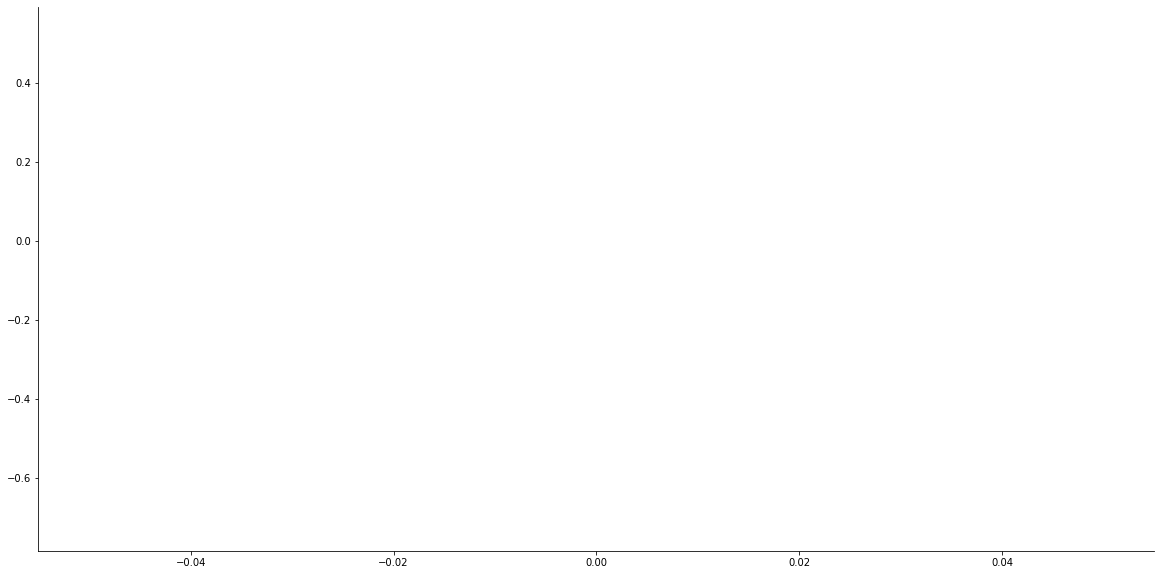

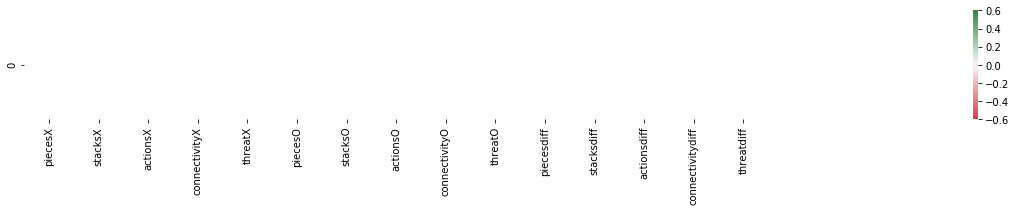

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(len(θ)):
    x = [j for j in range(len(θs))]
    y = [θs[j][i] for j in range(len(θs))]
    ax.plot(x, y)
sns.despine()
plt.show()

FACTOR=0.6
cmap = sns.diverging_palette(10, 133, as_cmap=True)
functions = ['pieces', 'stacks', 'actions', 'connectivity', 'threat']
lbls = [f + player for player in ['X', 'O'] for f in functions] + [f + 'diff'for f in functions]

fig, ax = plt.subplots(figsize=(20, 2))
sns.heatmap([θ], cmap=cmap, vmin=-FACTOR, vmax=FACTOR, ax=ax, xticklabels=lbls)
plt.show()

In [23]:
import cProfile
cProfile.run('tree_strap_train(θ, depth=2)')

C:\Users\camch\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


         248711216 function calls (248400749 primitive calls) in 380.961 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1002033    1.812    0.000    8.734    0.000 <ipython-input-1-18d29547d3e7>:12(__init__)
   165555    0.972    0.000    2.611    0.000 <ipython-input-1-18d29547d3e7>:139(terminal_test)
   163886    0.309    0.000   18.256    0.000 <ipython-input-1-18d29547d3e7>:151(__str__)
   163886    1.806    0.000   17.890    0.000 <ipython-input-1-18d29547d3e7>:152(<listcomp>)
   672560   40.245    0.000  178.900    0.000 <ipython-input-1-18d29547d3e7>:29(actions)
  7023038   53.611    0.000   92.793    0.000 <ipython-input-1-18d29547d3e7>:31(get_stack_actions)
  7023038   34.138    0.000   34.138    0.000 <ipython-input-1-18d29547d3e7>:54(<listcomp>)
   165521    1.020    0.000    6.116    0.000 <ipython-input-1-18d29547d3e7>:71(result)
181906/35258    1.248    0.000    1.874    0.000 <ipython-input-1-18d29547d3e7>

In [70]:
import cProfile
cProfile.run('tree_strap_train(θ, depth=2)')

C:\Users\camch\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in double_scalars


         1945961593 function calls (1941259930 primitive calls) in 5118.581 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 15299350   25.600    0.000   65.934    0.000 <ipython-input-68-5fdee2c306cd>:14(__init__)
  2527835   14.264    0.000   37.676    0.000 <ipython-input-68-5fdee2c306cd>:141(terminal_test)
  2501465    4.183    0.000  272.109    0.000 <ipython-input-68-5fdee2c306cd>:153(__str__)
 20011720  204.623    0.000  235.358    0.000 <ipython-input-68-5fdee2c306cd>:154(<listcomp>)
     2002    0.002    0.000    0.003    0.000 <ipython-input-68-5fdee2c306cd>:156(__hash__)
 10268550  549.545    0.000 1782.383    0.000 <ipython-input-68-5fdee2c306cd>:31(actions)
107088888  708.903    0.000 1232.838    0.000 <ipython-input-68-5fdee2c306cd>:33(get_stack_actions)
107088888  446.122    0.000  446.122    0.000 <ipython-input-68-5fdee2c306cd>:57(<listcomp>)
  2527334   14.794    0.000  346.106    0.000 <ipython-input-68-5